## Problem: Saturation chanel sometimes have lighting disturbances that make thresholding fail. 

A typical example of the problem is the 'Original image' in the plot below. In the python script i convert the image from BGR to the HSV colorspace in order to use the saturation chanel to identify the codeblocks. This can be reliable as code blocks should always be more saturated than the white background (A4 paper). Lighting may affect the saturation chanel so we have to ensure that white has a saturaion difference with the colored blocks we have to white balance the image.

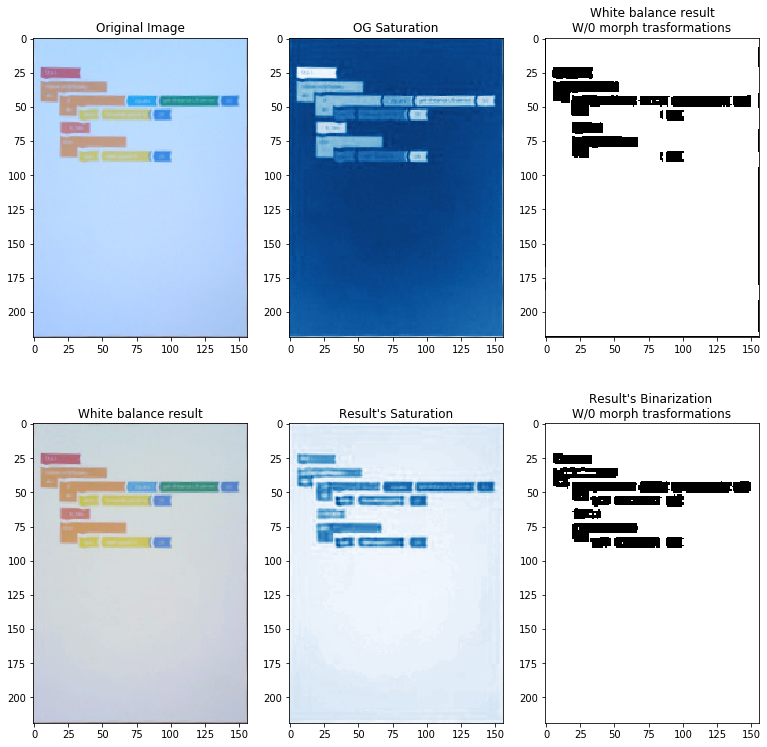

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def white_balance(img):
    result = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv.cvtColor(result, cv.COLOR_LAB2BGR)
    return result


image = cv.imread('notebook_images/balancing.jpg')

# Original image
_, s_before, _ = cv.split(image)
ret3, th_s_before = cv.threshold(s_before, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# White balanced
result = white_balance(image)
hsv = cv.cvtColor(result, cv.COLOR_BGR2HSV)
h,s,v = cv.split(hsv)
ret3, th_saturation = cv.threshold(s, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
th_saturation = np.invert(th_saturation)

# Plotting...
plt.figure(figsize=(13,13))
ax1 = plt.subplot(231)
ax1.title.set_text('Original Image')
ax1.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

ax2 = plt.subplot(232)
ax2.title.set_text('OG Saturation')
ax2.imshow(s_before, cmap='Blues')

ax3 = plt.subplot(233)
ax3.title.set_text('White balance result\nW/0 morph trasformations')
ax3.imshow(th_s_before, cmap='gray')

ax4 = plt.subplot(234)
ax4.title.set_text('White balance result')
ax4.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

ax5 = plt.subplot(235)
ax5.title.set_text('Result\'s Saturation')
ax5.imshow(s, cmap='Blues')

ax6 = plt.subplot(236)
ax6.title.set_text('Result\'s Binarization \nW/0 morph trasformations')
ax6.imshow(th_saturation, cmap='gray')

plt.show()

## Result:
Using 'Result's Saturation' all blocks are detected as expected.